<a href="https://colab.research.google.com/github/Krishguptaaa/Tariff-Fashion/blob/main/tariff_fashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
from google.colab import files #loading the file
data = files.upload()
data = pd.read_csv("Tariff_fashion.csv",encoding="latin1")
data

Saving Tariff_fashion.csv to Tariff_fashion (1).csv


,S.No,Product Name,Product Type,Brand Name,Price Before Tariff,Price After Tariff,Tariff Increase Percentage
0,245,T-shirt,Clothing,H&M,995.16,1288.27,29.45
1,311,T-shirt,Clothing,H&M,933.50,1274.61,36.54
2,369,T-shirt,Clothing,H&M,928.73,1281.10,37.94
3,141,T-shirt,Clothing,H&M,917.60,1111.12,21.09
4,188,T-shirt,Clothing,H&M,892.21,1065.80,19.46
...,...,...,...,...,...,...,...
398,164,Jeans,Clothing,Zara,188.27,247.98,31.72
399,233,Jeans,Clothing,Zara,158.71,213.18,34.32
400,277,Jeans,Clothing,Zara,124.06,146.91,18.42
401,255,Jeans,Clothing,Zara,106.25,120.17,13.10


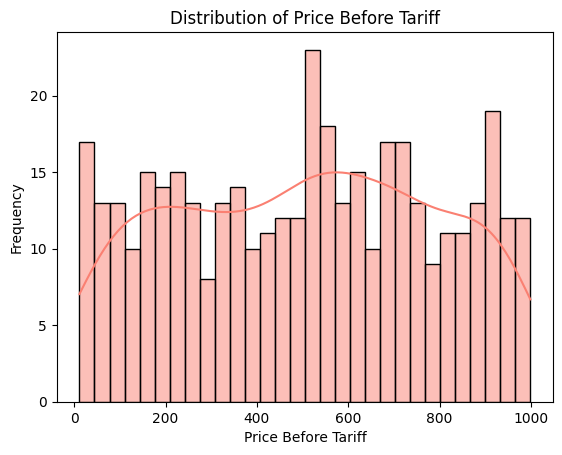

In [ ]:
sns.histplot(data['Price Before Tariff'], kde=True, bins=30, color='salmon') #plotting the data
plt.title('Distribution of Price Before Tariff')
plt.xlabel('Price Before Tariff')
plt.ylabel('Frequency')
plt.show()

In [ ]:
brand_corr = data.groupby('Brand Name')["Tariff Increase Percentage"].mean().sort_values(  ascending=False)
print(brand_corr)  #seeing brand correlation with percentage increase to find most affected ones


Brand Name
Reebok    31.549362
Adidas    31.146000
H&M       30.936275
Levi's    30.870645
Uniqlo    30.676923
Zara      28.407377
Puma      27.659545
Nike      25.356585
Name: Tariff Increase Percentage, dtype: float64


In [ ]:
product_corr = data.groupby('Product Name')["Tariff Increase Percentage"].mean().sort_values(  ascending=False)
print(product_corr)   # correlation of product name and %age increase

Product Name
Jeans       30.222411
T-shirt     30.130439
Sneakers    29.719694
Sandals     28.208861
Name: Tariff Increase Percentage, dtype: float64


In [ ]:
type_corr = data.groupby('Product Type')["Tariff Increase Percentage"].mean().sort_values(  ascending=False)
print(type_corr) #correlation of product type and %age increase

Product Type
Clothing    30.176018
Footwear    29.045367
Name: Tariff Increase Percentage, dtype: float64


In [ ]:
def remove_outliers(data,brand, product, col):  #function for finding outliers
  subset = data[(data["Brand Name"]==brand)& (data['Product Name']==product) ]



  q1 = subset[col].quantile(0.25)
  q3 = subset[col].quantile(0.75)
  iqr = q3-q1
  lower = q1-1.5*iqr
  upper = q3+1.5*iqr



  condition = ~((data['Brand Name'] == brand) &
                (data['Product Name'] == product) &
                ((data[col] < lower) | (data[col] > upper)))

  data = data[condition]
  return data

In [ ]:
brands = data['Brand Name'].unique()
products = data['Product Name'].unique()
price = data['Price Before Tariff']


In [ ]:
for product in products:
  for brand in brands:
    data = remove_outliers(data,brand,product,'Price Before Tariff') #running the function for different brands and products

In [ ]:
brand_corr = data.groupby('Brand Name')["Tariff Increase Percentage"].mean().sort_values(ascending=False)
print(brand_corr) #new correlation

Brand Name
Reebok    31.549362
H&M       31.327000
Adidas    31.146000
Levi's    30.870645
Uniqlo    30.676923
Zara      28.407377
Puma      28.041667
Nike      25.356585
Name: Tariff Increase Percentage, dtype: float64


In [ ]:
data.to_csv("Tariff_fashion_cleaned.csv",index=False)

In [ ]:
files.download("Tariff_fashion_cleaned.csv") #downloading the new csv

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
correlation = data['Price Before Tariff'].corr(data['Tariff Increase Percentage'])
print("correlation",correlation)

correlation -0.002806027584344196


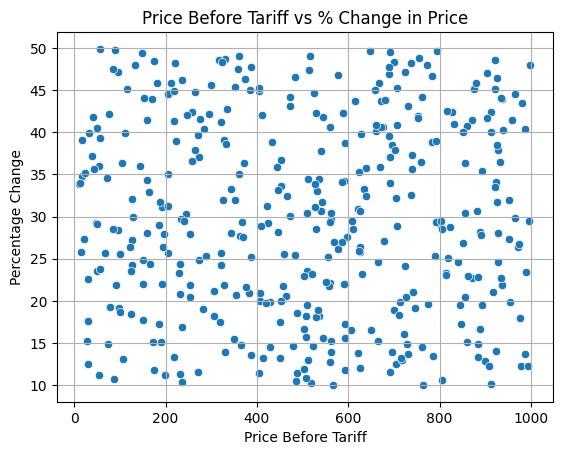

In [ ]:
sns.scatterplot(x=data["Price Before Tariff"], y=data["Tariff Increase Percentage"])
plt.title("Price Before Tariff vs % Change in Price")
plt.xlabel("Price Before Tariff")
plt.ylabel("Percentage Change")
plt.grid(True)
plt.show() #scatter plot for price before tariff and %age change


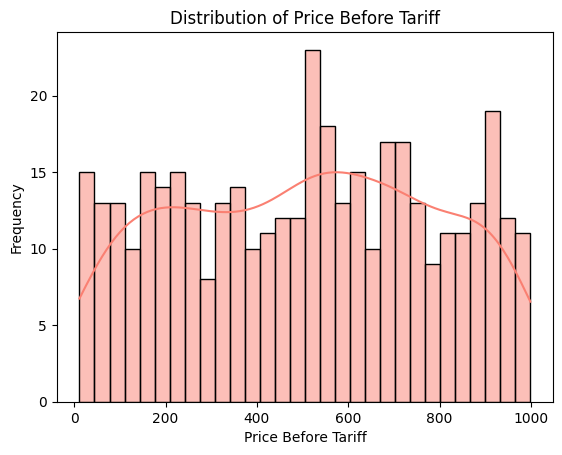

In [ ]:
sns.histplot(data['Price Before Tariff'], kde=True, bins=30, color='salmon')
plt.title('Distribution of Price Before Tariff')
plt.xlabel('Price Before Tariff')
plt.ylabel('Frequency')
plt.show()  # data plot after handling outliers
